In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from seaborn import set_style
set_style("whitegrid")

In [3]:
#Read data
bridge = pd.read_csv('./CoverMyMeds_data/bridge.csv')
dim_claims = pd.read_csv('./CoverMyMeds_data/dim_claims.csv')
dim_date = pd.read_csv('./CoverMyMeds_data/dim_date.csv')
dim_pa = pd.read_csv('./CoverMyMeds_data/dim_pa.csv')
all_merged = pd.read_csv('./CoverMyMeds_data/all_merged.csv')

In [4]:
all_merged.head()

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved,dim_claim_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
0,1,1,1,0,1,1.0,1,417380.0,A,75.0,0.0,2017-01-01,2017,1,1,1,0,0,1
1,2,1,0,0,1,3.0,1,417740.0,A,76.0,0.0,2017-01-01,2017,1,1,1,0,0,1
2,3,0,0,1,1,10.0,1,417380.0,A,75.0,0.0,2017-01-01,2017,1,1,1,0,0,1
3,4,1,1,0,1,11.0,1,999001.0,A,76.0,0.0,2017-01-01,2017,1,1,1,0,0,1
4,5,0,1,0,1,15.0,1,417614.0,A,70.0,0.0,2017-01-01,2017,1,1,1,0,0,1


In [5]:
# test if there is any duplicated data. 
all_merged.duplicated(subset=['dim_claim_id']).any()

False

## Next, we calculate the PA approval rate under certain condition. 

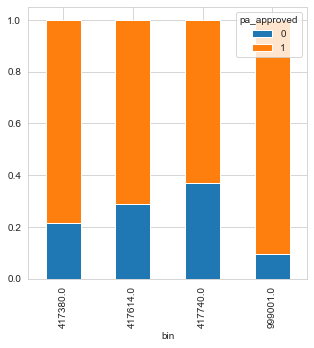

In [25]:
bin_pa = pd.crosstab(all_merged['bin'], all_merged['pa_approved'])
bin_pa.div(bin_pa.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(5,5))
plt.show()

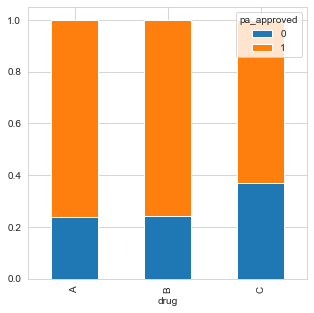

In [27]:
drug_pa = pd.crosstab(all_merged['drug'], all_merged['pa_approved'])
drug_pa.div(drug_pa.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(5,5))
plt.show()

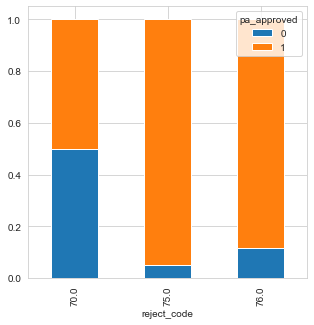

In [29]:
rejection_pa = pd.crosstab(all_merged['reject_code'], all_merged['pa_approved'])
rejection_pa.div(rejection_pa.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(5,5))
plt.show()

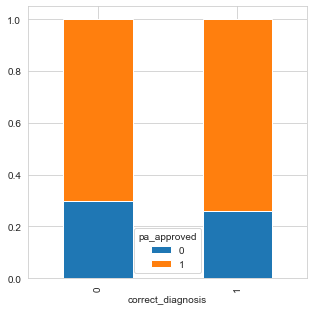

In [30]:
correct_diagnosis_pa = pd.crosstab(all_merged['correct_diagnosis'], all_merged['pa_approved'])
correct_diagnosis_pa.div(correct_diagnosis_pa.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(5,5))
plt.show()

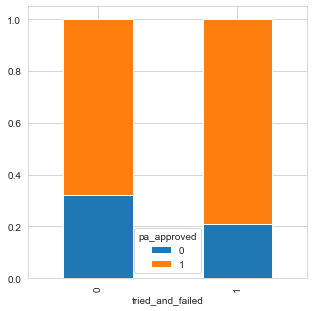

In [31]:
tried_and_failed_pa = pd.crosstab(all_merged['tried_and_failed'], all_merged['pa_approved'])
tried_and_failed_pa.div(tried_and_failed_pa.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(5,5))
plt.show()

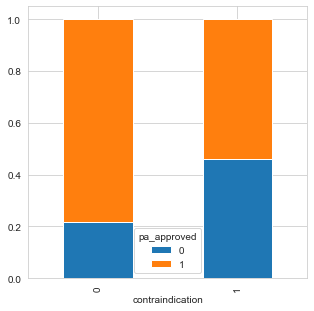

In [32]:
contraindication_pa = pd.crosstab(all_merged['contraindication'], all_merged['pa_approved'])
contraindication_pa.div(contraindication_pa.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(5,5))
plt.show()

<AxesSubplot:>

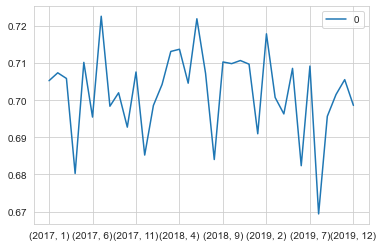

In [20]:
year_month = []
pa_approval_rate = []
for year in range(2017, 2020, 1):
    for month in range(1, 13, 1):
        # pd_by_year_month = all_merged.loc[ (all_merged['calendar_year']==year) & (all_merged['calendar_month']==month)&(all_merged['drug']=='C')&(all_merged['bin']==417614.0)&(all_merged['correct_diagnosis']==0) &(all_merged['tried_and_failed']==0)& (all_merged['contraindication']==0)]
        pd_by_year_month = all_merged.loc[ (all_merged['calendar_year']==year) & (all_merged['calendar_month']==month)&((all_merged['drug']=='C'))&(all_merged['tried_and_failed']!=0)]
        pa_approved = pd_by_year_month['pa_approved'].sum()
        pa_total = pd_by_year_month.shape[0]
        year_month.append((year, month))
        pa_approval_rate.append(pa_approved/pa_total)

pa_rate_per_month= pd.DataFrame(pa_approval_rate, index=year_month)
pa_rate_per_month.plot()

In [73]:
X = all_merged[['correct_diagnosis', 'tried_and_failed','contraindication', 'bin', 'drug', 'reject_code']].copy()
X = pd.get_dummies(X, prefix=['bin', 'drug', 'reject_code'], columns=['bin', 'drug', 'reject_code'])
y = all_merged['pa_approved'].copy()

In [ ]:
import seaborn as sns

Var_Corr = X.corr()

In [ ]:
result = permutation_importance(
    forest_clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=['correct_diagnosis', 'tried_and_failed','contraindication', 'dim_date_id','bin_417380.0', 'bin_417614.0', 'bin_417740.0', 'bin_999001.0', 'drug_A', 'drug_B', 'drug_C', 'reject_code_70.0', 'reject_code_75.0', 'reject_code_76.0'])
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()